In [2]:
import nltk


In [3]:
import pandas as pd
pd.set_option("display.max_colwidth",200)

NLP is bascilly making your raw text to read for model buliding</br>Net project:NLP + Model Building(ML Or DL)

In [4]:
data=pd.read_csv("/content/tweets.csv")
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [5]:
# Here 0 referes for positive and 1 refers for negative one

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [7]:
data.isnull().sum()

,0
id,0
label,0
tweet,0


In [8]:
data.drop(['id'],axis=1,inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [9]:
data['label'].value_counts(normalize=True)

,proportion
label,
0,0.744192
1,0.255808


<Axes: xlabel='label'>

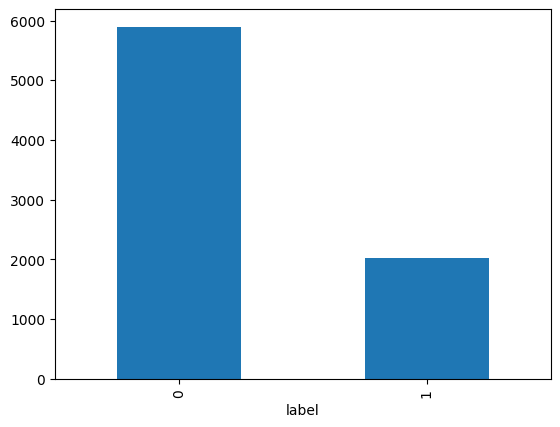

In [10]:
data['label'].value_counts().plot(kind='bar')

****Data Cleaning****

In [11]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [12]:
import re #Regular Expressions

In [13]:
#Substitute 's with " is"
re.sub(r"'s\b"," is",data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [14]:
#Removing the user mentions
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [15]:
#We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+","",data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [16]:
#Remove the hastags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [17]:
re.sub("#","",data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [18]:
#Remove the hyperlinks
re.sub(r"http\S+","",data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [19]:
#Retain on the alphabets(get rid of punctuations,special char,digits)
data['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [20]:
re.sub(r"[^a-zA-Z]"," ",data['tweet'][25])

'     billion for   patents where there is prior art       millions each   patent trolls are partying now thanks to Apple  apple'

In [21]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
#Stop word Removal
import nltk
from nltk.corpus import stopwords

In [23]:
nltk_stopwords= set(stopwords.words('english'))
nltk_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [24]:
len(nltk_stopwords)

198

In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords=set(ENGLISH_STOP_WORDS)
sklearn_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'do',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'find',
 'fire',
 'first',
 'five',
 'for'

In [26]:
len(sklearn_stopwords)

318

In [27]:
len(sklearn_stopwords.intersection(nltk_stopwords))

119

In [28]:
#Combining both stop words
combined_stopwods=nltk_stopwords.union(sklearn_stopwords)

In [29]:
len(combined_stopwods)

397

In [30]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
#Text Normalization: Stemming or Lemmatization(prefer)
#This will get reid of words like goes,go,went and convert into simple word go
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [32]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [33]:
new_sent=''
for token in data['tweet'][63].split():
  new_sent+=lemmatizer.lemmatize(token.lower()) + ' '

new_sent

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [34]:
pip install contractions

In [35]:
import contractions #This will expand the word like i would'nt ,won't
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [36]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

**Define the cleaner Function**

In [37]:
def tweet_cleaner_without_stopwords(text):
  new_text=re.sub(r"'s\b"," is",text)
  new_text=re.sub("#","",new_text)
  new_text=re.sub("@[A-Za-z0-9]+","",new_text)
  new_text=re.sub(r"http\S+","",new_text)
  new_text=contractions.fix(new_text)
  new_text=re.sub(r"[^a-zA-Z]"," ",new_text)
  new_text=new_text.lower().strip()

  cleaned_text= ''
  for token in new_text.split():
    cleaned_text=cleaned_text + lemmatizer.lemmatize(token) + " "
  return cleaned_text

In [38]:
cleaned_tweets=[] #List of cleaned tweets
for twt in data['tweet']:
  cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

cleaned_tweets[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [39]:
data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [40]:
cleaned_tweets[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [41]:
data['cleaned_tweets_w/o_SW']=cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


**Data Visualization**</br>
Plot the top 25 most common word in this tweets dataset

In [42]:
#Write a code to collect all the words from all the tweets into a single list
all_words=[]
for t in data['tweet']:
  all_words.extend(t.split())


print(all_words[:50])
len(set(all_words))

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


34348

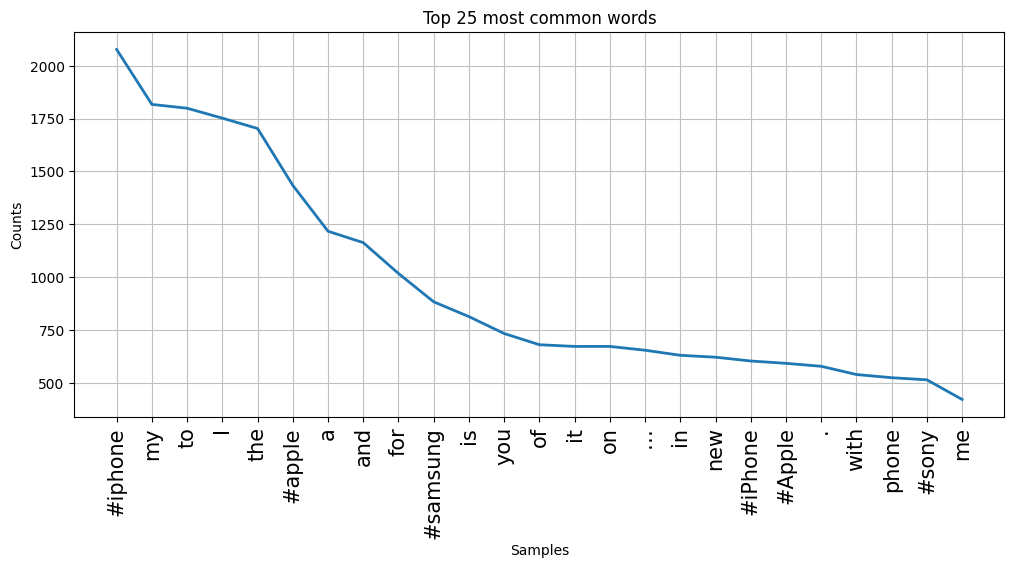

In [43]:
#Frequency Distribution
import matplotlib.pyplot as plt
freq_dist=nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)
freq_dist.plot(25,cumulative=False)
plt.show()

<Axes: title={'center': 'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

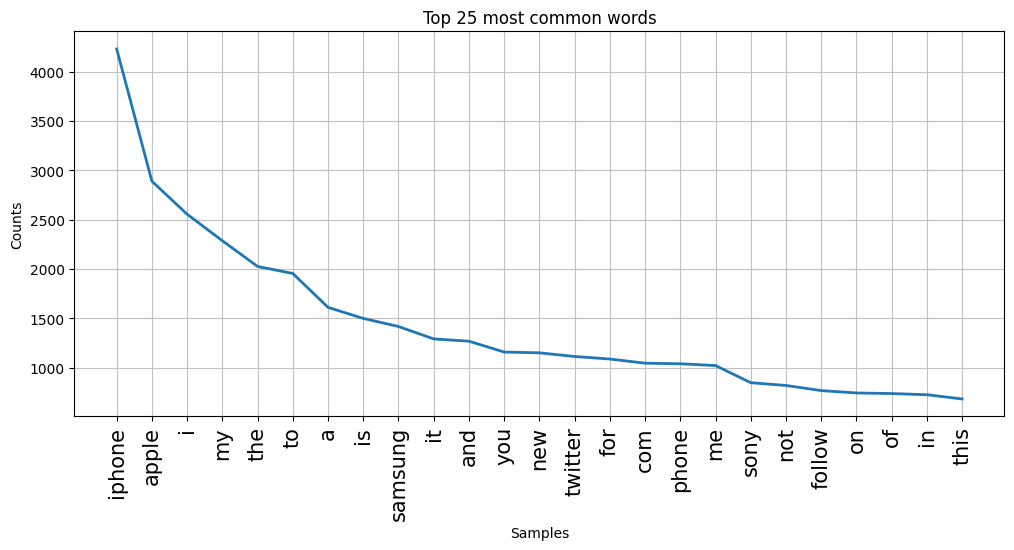

In [44]:
all_words=[]
for t in data['cleaned_tweets_w/o_SW']:
  all_words.extend(t.split())
freq_dist1=nltk.FreqDist(all_words)
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)
freq_dist1.plot(25,cumulative=False)

In [45]:
len(set(all_words))

15990

**After appling stopwords**

In [46]:
def tweet_cleaner_with_stopwords(text):
  new_text=re.sub(r"'s\b"," is",text)
  new_text=re.sub("#","",new_text)
  new_text=re.sub("@[A-Za-z0-9]+","",new_text)
  new_text=re.sub(r"http\S+","",new_text)
  new_text=contractions.fix(new_text)
  new_text=re.sub(r"[^a-zA-Z]"," ",new_text)
  new_text=new_text.lower().strip()

  new_text=[token for token in new_text.split() if token not in combined_stopwods]
  new_text=[token for token in new_text if len(token)>2]

  cleaned_text= ''
  for token in new_text:
    cleaned_text=cleaned_text + lemmatizer.lemmatize(token) + " "
  return cleaned_text

In [47]:
cleaned_tweets=list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [48]:
data['cleaned_tweets_with_SW']=cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


<Axes: title={'center': 'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

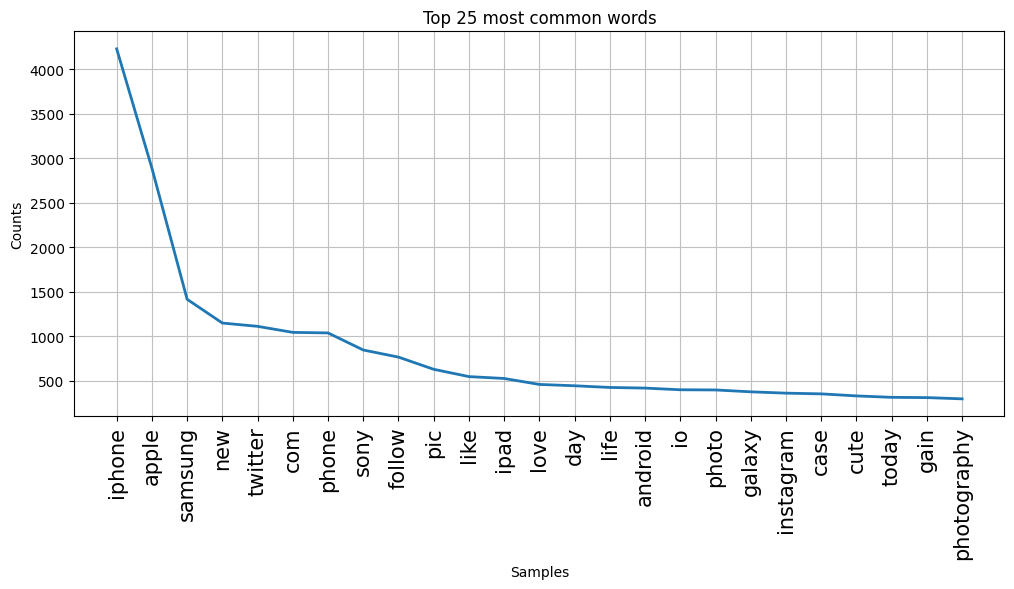

In [49]:
all_words=[]
for t in data['cleaned_tweets_with_SW']:
  all_words.extend(t.split())
freq_dist1=nltk.FreqDist(all_words)
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)
freq_dist1.plot(25,cumulative=False)

In [50]:
domain_stopwords=['phone','mobile','twitter','rt','com','follow']
final_stopwords=domain_stopwords + list(combined_stopwods)

**Bag of Words Model(Feature Extraction)**

*   Countvectorizer
*   TF-IDF Vectorizer



In [51]:
data.shape

(7920, 4)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer()
CV_features=CV.fit_transform(data['cleaned_tweets_w/o_SW'])

In [53]:
CV_features.shape

(7920, 15964)

In [54]:
type(CV_features[0]) #each row is a compressed sparse row

scipy.sparse._csr.csr_matrix

In [55]:
CV_features[0].todense() #Deacomposing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [56]:
import pandas as pd
df=pd.DataFrame(CV_features.todense())
df

,0,1,2,3,4,5,6,7,8,9,...,15954,15955,15956,15957,15958,15959,15960,15961,15962,15963
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df.size

126434880

In [58]:
import numpy as np
np.count_nonzero(df)

114975

In [59]:
#Ratio
np.count_nonzero(df)/df.size

0.0009093614040682445

In [60]:
CV.get_feature_names_out()[:50] #These are the vocab words

array(['aa', 'aaaahhhhhhh', 'aag', 'aah', 'aalborg', 'aand', 'aapl',
       'aarhus', 'aaron', 'aarp', 'aarrrggghhhh', 'aashamsakal',
       'aaydojbfkq', 'aayp', 'ab', 'abah', 'abareta', 'abay', 'abb',
       'abc', 'abdou', 'abe', 'aber', 'abercrombie', 'abi', 'ability',
       'abit', 'able', 'ableton', 'abnqum', 'aboard', 'about',
       'aboutalook', 'aboutdamntime', 'abouttime', 'abouttonight',
       'above', 'abp', 'abscbn', 'absence', 'absolute', 'absolutely',
       'absurd', 'abu', 'abudhabi', 'abuja', 'abujacity', 'abujafct',
       'abujapeople', 'abujaphones'], dtype=object)

In [61]:
len(CV.get_feature_names_out())

15964

In [62]:
CV_features[10].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [63]:
CV.inverse_transform(np.asarray(CV_features[10].todense())) #converting the array to the actual words

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

**Model Building**

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(CV_features,data['label'],test_size=0.25,stratify=data['label'],random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver='liblinear')
LR.fit(X_train,y_train)

print(LR.score(X_train,y_train))
print(LR.score(X_test,y_test))

0.9777777777777777
0.8813131313131313


L1 Regularization (Lasso): does built-in feature selection
When you use L1 regularization (like in Lasso Regression or in classifiers such as LogisticRegression with penalty='l1'), it has the ability to:

🔍 Automatically eliminate irrelevant features:</br>

*   L1 regularization shrinks some coefficients to exactly zero.
*   This means the corresponding features are excluded from the model.
*   So, it performs feature selection as part of training.

L2 Regularization (Ridge):
L2 regularization is used when you want to:
*   Prevent overfitting
*   Stabilize model coefficients
*   But not eliminate any features


In [66]:
#L1 -Regularization
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)#Find these all by hypertuning
LR1.fit(X_train,y_train)
print(LR1.score(X_train,y_train))
print(LR1.score(X_test,y_test))

0.9038720538720538
0.8818181818181818


In [67]:
#L2-Regularization
LR2=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l2',C=0.6)
LR2.fit(X_train,y_train)
print(LR2.score(X_train,y_train))
print(LR2.score(X_test,y_test))

0.9567340067340068
0.8914141414141414


In [68]:
#Lets cross Validate the  model
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import StratifiedKFold

In [69]:
X=CV_features
y=data['label']

In [70]:
#Lets cross Validate the  model LR1 model
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
results=cross_val_score(LR1,X,y,cv=kfold,scoring='accuracy')
print(results)
print(np.round((results.mean())*100,2),np.round((results.std())*100,2))

[0.88257576 0.86931818 0.87878788 0.89772727 0.88699495]
88.31 0.94


In [71]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
results=cross_validate(LR1,X,y,cv=kfold,scoring='accuracy',return_train_score=True)

In [72]:
results

{'fit_time': array([0.28002357, 0.16131091, 0.12461591, 0.06845689, 0.12189388]),
 'score_time': array([0.02775192, 0.00244236, 0.00873256, 0.00485897, 0.00607967]),
 'test_score': array([0.88257576, 0.86931818, 0.87878788, 0.89772727, 0.88699495]),
 'train_score': array([0.90388258, 0.90940657, 0.90419823, 0.90356692, 0.9040404 ])}

In [73]:
#Hypertuning for LR1 model
from sklearn.model_selection import GridSearchCV
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)
C_values=np.arange(0.00001,1,0.05)
grid=GridSearchCV(estimator=LR1,param_grid={'C':C_values},cv=kfold,scoring='accuracy',return_train_score=True,verbose=2,n_jobs=-1)
grid_results=grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [74]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(C=0.4, class_weight='balanced',
                                          penalty='l1', solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [75]:
grid_results.best_params_

{'C': 0.90001}

In [76]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.0151515151515

In [77]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100. #gridseach is not giving us best result as the mean of train and test differ too much

93.03030303030303

In [78]:
#Use pipeline
from sklearn.pipeline import Pipeline
X=data['cleaned_tweets_w/o_SW']
y=data['label']
CV=CountVectorizer()
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)
CV_pipe=Pipeline([
    ('CV',CV),
    ('LR',LR)
])
results=cross_val_score(CV_pipe,X,y,cv=kfold,scoring='accuracy')
print(np.round((results.mean())*100,2),np.round((results.std())*100,2))

88.65 0.98


**Linear Model Without the stop_words**

In [79]:
from sklearn.pipeline import Pipeline
X=data['cleaned_tweets_with_SW']
y=data['label']
CV=CountVectorizer()
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)
CV_pipe=Pipeline([
    ('CV',CV),
    ('LR',LR1)
])
results=cross_val_score(CV_pipe,X,y,cv=kfold,scoring='accuracy')
print(np.round((results.mean())*100,2),np.round((results.std())*100,2))

86.78 1.11


In [80]:
from sklearn.pipeline import Pipeline
X=data['cleaned_tweets_w/o_SW']
y=data['label']
CV=CountVectorizer(stop_words=list(combined_stopwods),min_df=10)
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)
CV_pipe=Pipeline([
    ('CV',CV),
    ('LR',LR1)
])
results=cross_val_score(CV_pipe,X,y,cv=kfold,scoring='accuracy')
print(np.round((results.mean())*100,2),np.round((results.std())*100,2))

86.87 1.17


In [81]:
CV_pipe

Pipeline(steps=[('CV',
                 CountVectorizer(min_df=10,
                                 stop_words=["hadn't", "isn't", 'con', 'behind',
                                             'thence', 'when', 'least', 'an',
                                             'side', 'put', 'along', 're',
                                             'the', "they'd", 'due', "that'll",
                                             'since', 'same', 'whither',
                                             'although', 'amongst', "she'd",
                                             'wasn', 'they', 'first',
                                             'meanwhile', 'else', 'this', 'isn',
                                             'to', ...])),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [82]:
CV_pipe.fit(X, y)

len(CV_pipe['CV'].vocabulary_) #This should be the our best model as we have to fit less feature and we are just comparmizing 1% in score.

1091

In [83]:
from sklearn.pipeline import Pipeline
X=data['cleaned_tweets_w/o_SW']
y=data['label']
CV=CountVectorizer(stop_words=list(combined_stopwods),min_df=10,max_features=1000)
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)
CV_pipe=Pipeline([
    ('CV',CV),
    ('LR',LR1)
])
results=cross_val_score(CV_pipe,X,y,cv=kfold,scoring='accuracy')
print(np.round((results.mean())*100,2),np.round((results.std())*100,2))

86.87 1.17


In [84]:
from sklearn.pipeline import Pipeline
X=data['cleaned_tweets_w/o_SW']
y=data['label']
CV=CountVectorizer(stop_words=list(combined_stopwods),max_features=300)
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)
CV_pipe=Pipeline([
    ('CV',CV),
    ('LR',LR1)
])
results=cross_val_score(CV_pipe,X,y,cv=kfold,scoring='accuracy')
print(np.round((results.mean())*100,2),np.round((results.std())*100,2))

85.29 1.02


**TF-IDF Vector BoW Model + Logistic Regression**

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=list(combined_stopwods),  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

87.0 0.21
85.76 1.23


1000

In [86]:
CV_pipe

Pipeline(steps=[('TFIDF',
                 TfidfVectorizer(max_features=1000, min_df=5,
                                 stop_words=["hadn't", "isn't", 'con', 'behind',
                                             'thence', 'when', 'least', 'an',
                                             'side', 'put', 'along', 're',
                                             'the', "they'd", 'due', "that'll",
                                             'since', 'same', 'whither',
                                             'although', 'amongst', "she'd",
                                             'wasn', 'they', 'first',
                                             'meanwhile', 'else', 'this', 'isn',
                                             'to', ...])),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

**Dimensionality Reduction**(Lets see how it works)

In [87]:
#[7920 * 15955] >>> [7920 * 1000]

In [88]:
#Can't use PCA because it did not work well with sparse data
from sklearn.decomposition import TruncatedSVD

X=data['cleaned_tweets_w/o_SW']
y=data['label']
TFIDF=TfidfVectorizer() #will originally have 15955 features
SVD=TruncatedSVD(n_components=1000) #Reduce it to 1000PCs

LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l2',C=0.15)
CV_pipe=Pipeline([
    ('TFIDF',TFIDF),
    ('SVD',SVD),
    ('LR',LR)
])
results=cross_validate(CV_pipe,X,y,cv=kfold,scoring='accuracy',return_train_score=True)
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

88.11 0.77


In [89]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(),
 'SVD': TruncatedSVD(n_components=1000),
 'LR': LogisticRegression(solver='liblinear')}

**N-Gram Models**

In [90]:
# Unigram +Bigram
X=data['cleaned_tweets_w/o_SW']
y=data['label']
#We want to include only those words which have minimum frequency 5
CV=CountVectorizer(stop_words=list(combined_stopwods),min_df=5,ngram_range=(1,2))
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)
CV_pipe=Pipeline([
    ('CV',CV),
    ('LR',LR1)
])
results=cross_validate(CV_pipe,X,y,cv=kfold,scoring='accuracy', return_train_score=True)
print(np.round((results['train_score'].mean())*100,2),np.round((results['train_score'].std())*100,2))
print(np.round((results['test_score'].mean())*100,2),np.round((results['test_score'].std())*100,2))
CV.fit_transform(X)
print(len(CV.vocabulary_))

89.03 0.26
86.78 0.85
3406


In [91]:
CV.vocabulary_

{'fingerprint': 909,
 'test': 3028,
 'android': 64,
 'apps': 176,
 'beautiful': 254,
 'cute': 629,
 'health': 1263,
 'igers': 1354,
 'iphoneonly': 1585,
 'iphonesia': 1594,
 'iphone': 1484,
 'android apps': 66,
 'apps beautiful': 177,
 'beautiful cute': 256,
 'igers iphoneonly': 1357,
 'iphoneonly iphonesia': 1590,
 'iphonesia iphone': 1597,
 'finally': 899,
 'case': 432,
 'thanks': 3052,
 'yay': 3368,
 'sony': 2795,
 'xperia': 3361,
 'sony xperia': 2816,
 'love': 1812,
 'talk': 2995,
 'relax': 2481,
 'smartphone': 2756,
 'wifi': 3304,
 'connect': 562,
 'wired': 3317,
 'know': 1680,
 'wa': 3255,
 'way': 3281,
 'home': 1301,
 'iphone cute': 1502,
 'amazing': 54,
 'service': 2666,
 'apple': 96,
 'question': 2432,
 'pay': 2194,
 'stupid': 2926,
 'support': 2958,
 'service apple': 2667,
 'software': 2785,
 'update': 3183,
 'fucked': 1019,
 'phone': 2211,
 'big': 291,
 'time': 3074,
 'iphones': 1593,
 'software update': 2786,
 'big time': 292,
 'happy': 1223,
 'instapic': 1449,
 'instadaily

In [92]:
# Unigram +Bigram+Trigram
X=data['cleaned_tweets_w/o_SW']
y=data['label']
#We want to include only those words which have minimum frequency 5
CV=CountVectorizer(stop_words=list(combined_stopwods),min_df=5,ngram_range=(1,3))
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.4)
CV_pipe=Pipeline([
    ('CV',CV),
    ('LR',LR1)
])
results=cross_validate(CV_pipe,X,y,cv=kfold,scoring='accuracy', return_train_score=True)
print(np.round((results['train_score'].mean())*100,2),np.round((results['train_score'].std())*100,2))
print(np.round((results['test_score'].mean())*100,2),np.round((results['test_score'].std())*100,2))
CV.fit_transform(X)
print(len(CV.vocabulary_))

89.03 0.26
86.78 0.85
4007


**Word Embadding**</br>
A word embedding is a class of approaches for representing words and documents using a dense vector representation. It is an improvement over more the traditional bag-of-word model encoding schemes where large sparse vectors were used to represent each word or to score each word within a vector to represent an entire vocabulary. These representations were sparse because the vocabularies were vast and a given word or document would be represented by a large vector comprised mostly of zero values.

Instead, in an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. The position of a word in the learned vector space is referred to as its embedding. Two popular examples of methods of learning word embeddings from text include:




*   Word2Vec.
*   GloVe.


In addition to these carefully designed methods, a word embedding can be learned as part of a deep learning model. This can be a slower approach, but tailors the model to a specific training dataset.

In [93]:
# !pip install scipy==1.10.1 numpy==1.24.3 gensim==4.3.2 --no-cache-dir


In [94]:
from gensim.models import Word2Vec
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
        ['this', 'is', 'the', 'second', 'sentence'],
        ['yet', 'another', 'sentence'],
        ['one', 'more', 'sentence', 'love'],
        ['and', 'the', 'final', 'sentence', 'solve']]

In [95]:
cbow_model=Word2Vec(sentences,vector_size=10,window=3,min_count=1,sg=0)

In [96]:
print(cbow_model)

Word2Vec<vocab=16, vector_size=10, alpha=0.025>


In [97]:
list(cbow_model.wv.key_to_index.keys())

['sentence',
 'the',
 'is',
 'this',
 'solve',
 'final',
 'and',
 'love',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first']

In [98]:
#Access vector for one word
cbow_model.wv.get_vector('love')

array([ 0.05455598,  0.08345091, -0.0145442 , -0.09208831,  0.04371774,
        0.00572208,  0.07440059, -0.00813585, -0.0263755 , -0.08752632],
      dtype=float32)

In [99]:
for key in cbow_model.wv.key_to_index.keys():
  print(key,':',cbow_model.wv.get_vector(key))

sentence : [-0.00536351  0.00238484  0.05107331  0.09015599 -0.09308276 -0.0711995
  0.06464671  0.08974326 -0.0501915  -0.03765175]
the : [ 0.07379383 -0.01529509 -0.04534442  0.06555367 -0.04861008 -0.0181848
  0.02882639  0.00993654 -0.08292154 -0.0944667 ]
is : [ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
this : [-0.07512096 -0.00929068  0.09539422 -0.07316343 -0.02336625 -0.01939589
  0.08080077 -0.0592867   0.00042713 -0.04753667]
solve : [-0.09603605  0.05007694 -0.08758304 -0.04394896 -0.00034404 -0.00295622
 -0.07661133  0.09616364  0.04980589  0.09235525]
final : [-0.08158192  0.04498189 -0.04134833  0.00827747  0.08496136 -0.04464175
  0.04521902 -0.06785722 -0.03552099  0.09398862]
and : [-0.0157806   0.00323172 -0.04137019 -0.0768177  -0.01509309  0.02468751
 -0.00885536  0.05536246 -0.02745937  0.02261946]
love : [ 0.05455598  0.08345091 -0.0145442  -0.09208831  0.04371774  0.00572208
  0.074400

In [100]:
sg_model=Word2Vec(sentences,vector_size=10,window=3,min_count=1,sg=1)
sg_model.wv.get_vector('love')

array([ 0.05455508,  0.08348128, -0.01442463, -0.09193361,  0.04362334,
        0.00568476,  0.07447571, -0.00811199, -0.02645334, -0.0874837 ],
      dtype=float32)

**Using Stanford’s GloVe Embedding**
Stanford researchers also have their own word embedding algorithm like Word2Vec called Global Vectors for Word Representation, or GloVe for short.

You can download the GloVe pre-trained word vectors and load them easily with Gensim. The first step is to convert the GloVe file format to the Word2Vec file format. The only difference is the addition of a small header line. This can be done by calling the glove2word2vec() function. Once converted, the file can be loaded just like Word2Vec file above.

You can download the smallest GloVe pre-trained model from the GloVe website. It an 822 Megabyte zip file with 4 different models (50, 100, 200 and 300-dimensional vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary. The direct download link is here http://nlp.stanford.edu/data/glove.6B.zip

In [101]:
# from gensim.models import KeyedVectors
# from gensim.scripts.glove2word2vec import glove2word2vec

# # convert glove to word2vec format
# path = r'D:\OneDrive\Google Drive Files\Training\1 MASTER\NLP new\Word Embeddings'

# glove_input_file = path + '\glove.6B.100d.txt'
# word2vec_output_file = 'word2vec.txt'
# glove2word2vec(glove_input_file, word2vec_output_file)

**Facebook's FastText**</br>
fastText is the improvised version of word2vec. word2vec basically considers words to build the representation. But fastText takes each character while computing the representation of the word.

In [102]:
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
['nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

In [103]:

from gensim.models import FastText
fast = FastText(sentences,vector_size=20, window=1, min_count=1, workers=5, min_n=1, max_n=2)

In [104]:
fast.wv.get_vector('future')

array([ 0.00718044,  0.00634451,  0.01015092,  0.00278108,  0.00071975,
        0.01481973, -0.01144717,  0.0085934 ,  0.00387139, -0.00861204,
       -0.01795045, -0.00222266,  0.0043997 ,  0.01099374,  0.00549521,
       -0.02154304,  0.02005067, -0.00923354,  0.00634542,  0.00346849],
      dtype=float32)

**Using word Embedding**

In [105]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [106]:
tweets_list=list(data['cleaned_tweets_w/o_SW'].apply(lambda x:x.split()))


In [107]:
from gensim.models import Word2Vec
embedding_size=300
cbow_model=Word2Vec(tweets_list,vector_size=embedding_size,window=3,min_count=5,sg=0)

In [108]:
cbow_model.wv.index_to_key

['iphone',
 'apple',
 'i',
 'my',
 'the',
 'to',
 'a',
 'is',
 'samsung',
 'it',
 'and',
 'you',
 'new',
 'twitter',
 'for',
 'com',
 'phone',
 'me',
 'sony',
 'not',
 'follow',
 'on',
 'of',
 'in',
 'this',
 'pic',
 'with',
 'have',
 's',
 'like',
 'ipad',
 'so',
 'love',
 'am',
 'day',
 'just',
 'at',
 'life',
 'android',
 'io',
 'now',
 'photo',
 'that',
 'rt',
 'all',
 'galaxy',
 'your',
 'instagram',
 'an',
 'case',
 'do',
 'cute',
 'get',
 'are',
 'today',
 'gain',
 'will',
 'photography',
 'got',
 'back',
 'fun',
 'from',
 'p',
 'be',
 'news',
 'music',
 'out',
 'instagood',
 'time',
 'app',
 'happy',
 'smile',
 'beautiful',
 'who',
 'work',
 'but',
 'girl',
 'funny',
 'birthday',
 'one',
 'lol',
 'fashion',
 'game',
 'make',
 'if',
 'ipod',
 'tech',
 'itunes',
 'when',
 'no',
 'up',
 'iphonex',
 'cannot',
 'we',
 'friend',
 'photooftheday',
 'would',
 'what',
 'finally',
 'everyone',
 'update',
 'why',
 'good',
 'can',
 'amazing',
 'apps',
 'd',
 'they',
 'note',
 'want',
 'mus

In [109]:
len(cbow_model.wv.index_to_key)

2421

In [110]:
def document_vector(doc):
  doc1=[word for word in doc.split() if word in cbow_model.wv.index_to_key]
  wv1=[]
  for word in doc1:
    wv1.append(cbow_model.wv.get_vector(word))
  wv1=np.array(wv1)
  wv1_mean=wv1.mean(axis=0)
  return wv1_mean

In [111]:
tweets_temp=data['cleaned_tweets_w/o_SW'].apply(document_vector)

In [112]:
#Fetching the document vectors from above list and convert it into numpy array
tweets_vec=np.ones((len(tweets_list),embedding_size))*np.nan
for i in range(tweets_temp.shape[0]):
  tweets_vec[i,:]=tweets_temp.iloc[i]
tweets_vec.shape


(7920, 300)

In [113]:
df=pd.DataFrame(tweets_vec)
df['y']=y
df.dropna(how='any',axis=0,inplace=True)

In [114]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,0.070797,0.305365,-0.141007,0.029733,0.074944,-0.439502,0.294052,0.623804,-0.185106,0.090395,...,0.239688,0.128038,0.078649,0.230834,0.294855,0.084932,-0.213276,0.200672,-0.007100,0
1,0.022523,0.234575,-0.013295,0.104889,0.010050,-0.299688,0.202501,0.501092,-0.069016,-0.281656,...,0.285924,0.182493,0.008032,0.274183,0.294967,-0.034674,-0.251158,0.143533,-0.143022,0
2,-0.028670,0.195266,0.050802,0.167639,0.034013,-0.174437,0.172321,0.512856,0.109477,-0.182911,...,0.260953,0.180074,0.086548,0.315296,0.281117,-0.010264,-0.133317,0.092360,-0.132757,0
3,-0.012690,0.188773,0.095780,0.243145,0.027254,-0.154266,0.165749,0.573219,0.193736,-0.260237,...,0.310897,0.236614,0.119465,0.412108,0.318517,-0.027246,-0.142227,0.080505,-0.179366,0
4,-0.036848,0.191497,0.084606,0.222790,0.024228,-0.138181,0.159220,0.540976,0.177110,-0.296788,...,0.306246,0.226463,0.094070,0.378125,0.323420,-0.040177,-0.139524,0.067595,-0.185897,1


In [115]:
X_word_embedding=df.drop('y',axis=1)
y_word_embedding=df['y']

In [116]:
LR.fit(X_word_embedding,y_word_embedding)

LogisticRegression(solver='liblinear')

In [117]:
score=cross_val_score(LR,X_word_embedding,y_word_embedding,cv=kfold,scoring='accuracy')
print(np.round((score.mean())*100,2),np.round((score.std())*100,2))

85.42 0.89


In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_embedding, y_word_embedding, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

85.41 0.26
84.99 0.7


**Simple deep learning models with OHE(Binary) Features**

In [119]:
# !pip uninstall -y numpy keras tensorflow
# !pip install numpy==1.23.5 keras==2.11.0 tensorflow==2.11.0 --force-reinstall


In [120]:
# !pip install numpy==1.24.3 tensorflow==2.15.0 keras==2.15.0 --no-cache-dir --force-reinstall


In [121]:
# !pip install numpy==1.25.2 --force-reinstall


In [122]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import ModelCheckpoint
import pydot
import keras.backend as K
from tensorflow.keras.utils import plot_model

In [123]:
def define_model(n_words):
  model=Sequential()
  model.add(Dense(64,input_shape=(n_words,),activation='relu',kernel_regularizer='l2'))
  # model.add(Dropout(0.5))
  model.add(Dense(32,activation='relu',kernel_regularizer='l2'))
  # model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  #Compile model
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'],)

  #Summarize defined model
  model.summary()
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  return model

In [124]:
# Evaluate a neural network model (cross-validate)
def evalute_model(Xtrain,ytrain,Xtest,ytest):
  scores=list()
  n_repeats=5
  n_words=Xtest.shape[1]

  for i in range(n_repeats):
     model=define_model(n_words)
     model.fit(Xtrain,ytrain,epochs=10,verbose=0)
     _,accuracy=model.evaluate(Xtest,ytest,verbose=0)
     scores.append(accuracy)
     print('%d accuracy: %s'%(i+1,accuracy))
  return scores

In [127]:
#Fit a tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer


def create_tokenizer(lines):
  tokenizer=Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [128]:
#Create the tokenizer
tokenizer=create_tokenizer(data['cleaned_tweets_w/o_SW'])

In [130]:
# create the tokenizer
train_docs = data['cleaned_tweets_with_SW']
tokenizer = create_tokenizer(train_docs)

In [132]:

X = tokenizer.texts_to_matrix(train_docs, mode='binary')

In [133]:
X.shape

(7920, 15357)

In [134]:
X[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [135]:
y=data['label']

In [136]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [137]:
# define network
K.clear_session()
n_words = Xtrain.shape[1]
model = define_model(n_words)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 985,025 (3.76 MB)

 Trainable params: 985,025 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
# fit network
checkpoint = ModelCheckpoint("BestModel.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
callbacks = [checkpoint]

h = model.fit(Xtrain, ytrain, validation_split=0.1, callbacks = callbacks, batch_size=180, epochs=25, verbose=2)

Epoch 1/25

Epoch 1: val_loss improved from inf to 0.83954, saving model to BestModel.h5


32/32 - 3s - 96ms/step - accuracy: 0.7248 - loss: 1.2153 - val_accuracy: 0.7492 - val_loss: 0.8395
Epoch 2/25

Epoch 2: val_loss improved from 0.83954 to 0.63487, saving model to BestModel.h5


32/32 - 2s - 71ms/step - accuracy: 0.7945 - loss: 0.7260 - val_accuracy: 0.8423 - val_loss: 0.6349
Epoch 3/25

Epoch 3: val_loss improved from 0.63487 to 0.54555, saving model to BestModel.h5


32/32 - 3s - 99ms/step - accuracy: 0.8543 - loss: 0.5924 - val_accuracy: 0.8628 - val_loss: 0.5456
Epoch 4/25

Epoch 4: val_loss improved from 0.54555 to 0.49247, saving model to BestModel.h5


32/32 - 2s - 56ms/step - accuracy: 0.8764 - loss: 0.5213 - val_accuracy: 0.8659 - val_loss: 0.4925
Epoch 5/25

Epoch 5: val_loss improved from 0.49247 to 0.45667, saving model to BestModel.h5


32/32 - 1s - 37ms/step - accuracy: 0.8811 - loss: 0.4743 - val_accuracy: 0.8659 - val_loss: 0.4567
Epoch 6/25

Epoch 6: val_loss improved from 0.45667 to 0.43418, saving model to BestModel.h5


32/32 - 1s - 39ms/step - accuracy: 0.8862 - loss: 0.4416 - val_accuracy: 0.8675 - val_loss: 0.4342
Epoch 7/25

Epoch 7: val_loss improved from 0.43418 to 0.41679, saving model to BestModel.h5


32/32 - 1s - 41ms/step - accuracy: 0.8907 - loss: 0.4187 - val_accuracy: 0.8738 - val_loss: 0.4168
Epoch 8/25

Epoch 8: val_loss improved from 0.41679 to 0.40595, saving model to BestModel.h5


32/32 - 1s - 37ms/step - accuracy: 0.8971 - loss: 0.4022 - val_accuracy: 0.8770 - val_loss: 0.4060
Epoch 9/25

Epoch 9: val_loss improved from 0.40595 to 0.39724, saving model to BestModel.h5


32/32 - 1s - 39ms/step - accuracy: 0.9009 - loss: 0.3901 - val_accuracy: 0.8785 - val_loss: 0.3972
Epoch 10/25

Epoch 10: val_loss improved from 0.39724 to 0.39048, saving model to BestModel.h5


32/32 - 2s - 47ms/step - accuracy: 0.9016 - loss: 0.3802 - val_accuracy: 0.8880 - val_loss: 0.3905
Epoch 11/25

Epoch 11: val_loss improved from 0.39048 to 0.38794, saving model to BestModel.h5


32/32 - 2s - 75ms/step - accuracy: 0.9062 - loss: 0.3701 - val_accuracy: 0.8770 - val_loss: 0.3879
Epoch 12/25

Epoch 12: val_loss improved from 0.38794 to 0.38240, saving model to BestModel.h5


32/32 - 2s - 78ms/step - accuracy: 0.9100 - loss: 0.3626 - val_accuracy: 0.8785 - val_loss: 0.3824
Epoch 13/25

Epoch 13: val_loss improved from 0.38240 to 0.38026, saving model to BestModel.h5


32/32 - 3s - 79ms/step - accuracy: 0.9121 - loss: 0.3577 - val_accuracy: 0.8849 - val_loss: 0.3803
Epoch 14/25

Epoch 14: val_loss improved from 0.38026 to 0.37977, saving model to BestModel.h5


32/32 - 1s - 36ms/step - accuracy: 0.9148 - loss: 0.3511 - val_accuracy: 0.8738 - val_loss: 0.3798
Epoch 15/25

Epoch 15: val_loss did not improve from 0.37977
32/32 - 1s - 35ms/step - accuracy: 0.9127 - loss: 0.3469 - val_accuracy: 0.8912 - val_loss: 0.3808
Epoch 16/25

Epoch 16: val_loss did not improve from 0.37977
32/32 - 1s - 39ms/step - accuracy: 0.9193 - loss: 0.3417 - val_accuracy: 0.8675 - val_loss: 0.3806
Epoch 17/25

Epoch 17: val_loss improved from 0.37977 to 0.37574, saving model to BestModel.h5


32/32 - 2s - 61ms/step - accuracy: 0.9199 - loss: 0.3381 - val_accuracy: 0.8785 - val_loss: 0.3757
Epoch 18/25

Epoch 18: val_loss improved from 0.37574 to 0.37196, saving model to BestModel.h5


32/32 - 4s - 125ms/step - accuracy: 0.9218 - loss: 0.3321 - val_accuracy: 0.8912 - val_loss: 0.3720
Epoch 19/25

Epoch 19: val_loss did not improve from 0.37196
32/32 - 3s - 92ms/step - accuracy: 0.9223 - loss: 0.3274 - val_accuracy: 0.8833 - val_loss: 0.3744
Epoch 20/25

Epoch 20: val_loss did not improve from 0.37196
32/32 - 1s - 39ms/step - accuracy: 0.9279 - loss: 0.3235 - val_accuracy: 0.8785 - val_loss: 0.3784
Epoch 21/25

Epoch 21: val_loss did not improve from 0.37196
32/32 - 1s - 36ms/step - accuracy: 0.9284 - loss: 0.3179 - val_accuracy: 0.8896 - val_loss: 0.3736
Epoch 22/25

Epoch 22: val_loss improved from 0.37196 to 0.37029, saving model to BestModel.h5


32/32 - 1s - 36ms/step - accuracy: 0.9314 - loss: 0.3168 - val_accuracy: 0.8864 - val_loss: 0.3703
Epoch 23/25

Epoch 23: val_loss did not improve from 0.37029
32/32 - 1s - 35ms/step - accuracy: 0.9318 - loss: 0.3109 - val_accuracy: 0.8896 - val_loss: 0.3734
Epoch 24/25

Epoch 24: val_loss did not improve from 0.37029
32/32 - 1s - 38ms/step - accuracy: 0.9369 - loss: 0.3075 - val_accuracy: 0.8849 - val_loss: 0.3714
Epoch 25/25

Epoch 25: val_loss did not improve from 0.37029
32/32 - 1s - 36ms/step - accuracy: 0.9344 - loss: 0.3082 - val_accuracy: 0.8628 - val_loss: 0.3849


Text(0, 0.5, 'Loss Fn valaues')

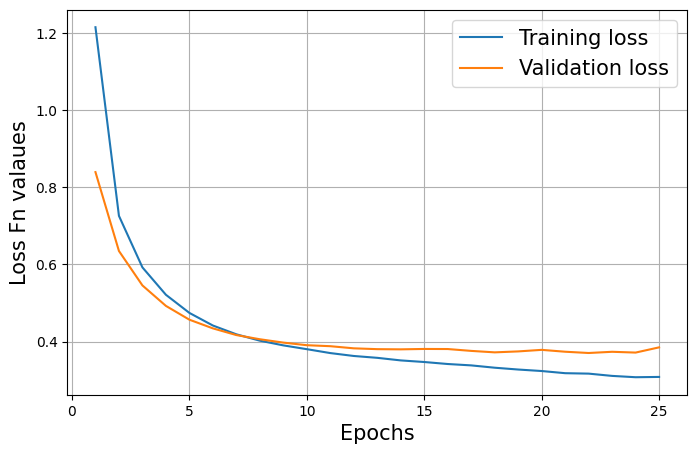

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['loss'], label='Training loss')
plt.plot(list(range(1,26)), h.history['val_loss'], label='Validation loss')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Fn valaues', fontsize=15)

In [140]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 87.184346
